In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle

tloss 0.02709767892013622 vloss 0.02893667295575142


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/dpLCustomHalfCheetah-sparse0.5-h30-n10000-filteredJ-npLsd331491256-nh500-pdTrue-doFalse-bnFalseJ-ne100-vf0.1-lr0.001.csv'

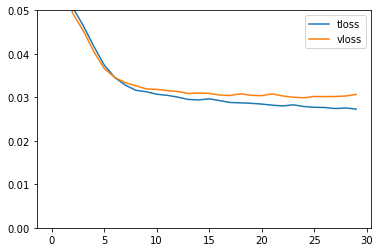

In [2]:
model_seeds = [331491256, 317996, 21791086, 33835675, 6585405]
model_names = ['checkpoints/dpLCustomIB-maFalse-h20-n10000J-npLgru-sd{}-nh500-pdTrueJ-ne30-vf0.1-lr0.001.csv'.format(sd) for sd in model_seeds]
tlosses = []
vlosses = []
for name in model_names:
    tloss, vloss = np.loadtxt(name, delimiter=',')
    tlosses.append(tloss)
    vlosses.append(vloss)
print('tloss {} vloss {}'.format(np.min(tlosses), np.min(vlosses)))
plt.figure()
plt.plot(np.mean(tlosses, axis=0), label='tloss')
plt.plot(np.mean(vlosses, axis=0), label='vloss')
plt.legend()
plt.ylim(0, 0.05)

model_names = ['checkpoints/dpLCustomHalfCheetah-sparse0.5-h30-n10000-filteredJ-npLsd{}-nh500-pdTrue-doFalse-bnFalseJ-ne100-vf0.1-lr0.001.csv'.format(sd) for sd in model_seeds]
tlosses = []
vlosses = []
for name in model_names:
    tloss, vloss = np.loadtxt(name, delimiter=',')
    tlosses.append(tloss)
    vlosses.append(vloss)
print('tloss {} vloss {}'.format(np.min(tlosses), np.min(vlosses)))
plt.figure()
plt.plot(np.mean(tlosses, axis=0), label='tloss')
plt.plot(np.mean(vlosses, axis=0), label='vloss')
plt.legend()
plt.ylim(0, 0.05)

In [2]:
data = [
    (19922827, 4/10.0, 8.05488047, 0.00579631),
    (21791086, 7.5/10, 8.31586270, 0.00300735),
    (28503138, 1/10.0, 8.33455039, 0.00148251),
    (317996, 0/10.0, 8.04880773, 0.00225784),
    (331491256, 7/10.0, 7.66668678, 0.00272338),
    (33835675, 6/10.0, 7.81740440, 0.00305640),
    (6585405, 9/10.0, 8.19764108, 0.00454791),
    (75720855, 10/10.0, 8.01008994, 0.00369659),
    (85003283, 6/10.0, 8.37361522, 0.00647834),
    (88341058, 7/10.0, 7.97466210, 0.00188351)
]
perf = np.fromiter((x[1] for x in data), dtype=np.float)
mses = np.fromiter((x[2] for x in data), dtype=np.float)
lastmses = np.fromiter((x[3] for x in data), dtype=np.float)
plt.figure()
plt.title('Avg MSE vs % of good policy seeds')
plt.plot(mses, perf, '.')
plt.figure()
plt.title('Avg MSE of last step vs % of good policy seeds')
plt.plot(lastmses, perf, '.')


NameError: name 'np' is not defined

0.0
-70.3540621034
 0: Ensemble -34.222 - Oracle -43.954
 1: Ensemble -36.598 - Oracle -46.146
 2: Ensemble -37.204 - Oracle -43.882
 3: Ensemble -38.774 - Oracle -46.592
 4: Ensemble -40.519 - Oracle -51.273
 5: Ensemble -43.275 - Oracle -53.037
 6: Ensemble -43.285 - Oracle -59.369
 7: Ensemble -43.486 - Oracle -53.290
 8: Ensemble -44.998 - Oracle -96.070
 9: Ensemble -45.433 - Oracle -65.192
10: Ensemble -48.902 - Oracle -53.542
11: Ensemble -49.133 - Oracle -82.382
12: Ensemble -49.243 - Oracle -66.189
13: Ensemble -50.951 - Oracle -73.766
14: Ensemble -52.330 - Oracle -54.913
15: Ensemble -52.629 - Oracle -101.939
16: Ensemble -52.653 - Oracle -101.849
17: Ensemble -52.752 - Oracle -101.740
18: Ensemble -55.908 - Oracle -56.628
19: Ensemble -56.800 - Oracle -73.065
20: Ensemble -58.411 - Oracle -56.359
21: Ensemble -61.027 - Oracle -106.949
22: Ensemble -61.058 - Oracle -88.374
23: Ensemble -75.780 - Oracle -62.216
24: Ensemble -80.190 - Oracle -66.982
25: Ensemble -80.196 - Orac

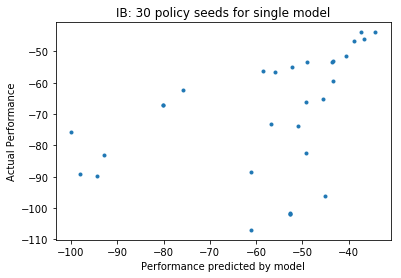

In [46]:
esize = 1
#with open('results/results_ensemble{}_50psd_thompson.pkl'.format(esize),'rb') as f:
#with open('results_swimmer_thompson/results-size{}-discount99.pkl'.format(esize),'rb') as f:
#with open('results_swimmer_random/results-size{}-discount99.pkl'.format(esize),'rb') as f:
#with open('results_halfcheetah_random/results-size1-horizon30.pkl'.format(esize),'rb') as f:
#with open('results_halfcheetah_thompson/results-size{}-pbs500.pkl'.format(esize),'rb') as f:
with open('results_ib_thompson/results-size{}-horizon30-discount100.pkl'.format(esize),'rb') as f:
    data = pickle.load(f)
# graph the last trpo iteration
for v in data.values():
    selfperf = []
    perf = []
    for e in v.values():
        selfperf.append(e[-1][1])
        perf.append(e[-1][2])
    selfperf = np.array(selfperf)
    perf = np.array(perf)
    sorted_ixs = np.argsort(selfperf)
    selfperf = selfperf[sorted_ixs]
    perf = perf[sorted_ixs]
    plt.figure()
    plt.title('IB: 30 policy seeds for single model'.format(esize))
    plt.plot(selfperf[-45:], perf[-45:]+np.random.randn(*perf[-45:].shape)*0.05, '.')
    plt.xlabel('Performance predicted by model')
    plt.ylabel('Actual Performance')
    #plt.savefig('figures/ib{}.eps'.format(esize))
    print(np.mean(np.array(perf) > 0.95))
print(np.mean(perf[:]))
for i in range(selfperf.shape[0]):
    print('{:2}: Ensemble {:.3f} - Oracle {:.3f}'.format(i, selfperf[-1-i], perf[-1-i]))

[[ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          0.99666667  1.          1.        ]]
[[ 1.    1.    0.    1.    1.  ]
 [ 1.    1.    1.    1.    1.  ]
 [ 1.    1.    0.    1.    0.93]]
0.489361702128
0.736842105263
0.46875


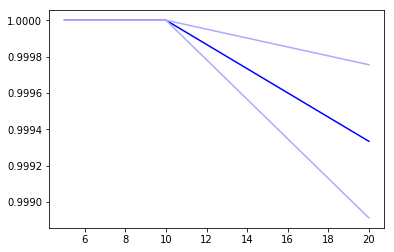

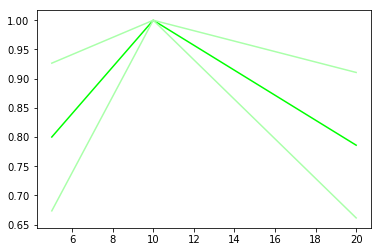

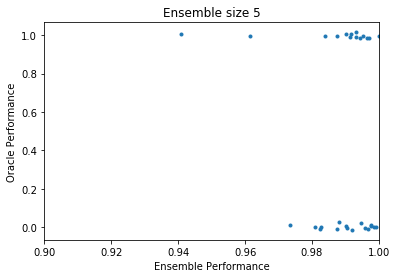

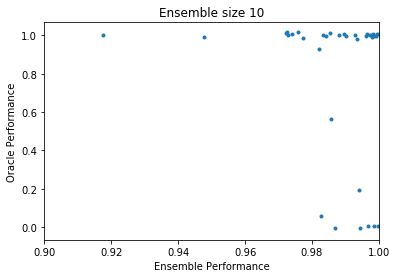

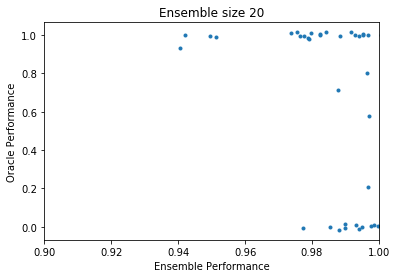

In [2]:
# print multiple ensembles
size_list = [5,10,20]
reps = 5
best_rs = np.zeros((len(size_list), reps))
best_ro = np.zeros((len(size_list), reps))

rs_combined = [[] for _ in range(len(size_list))]
ro_combined = [[] for _ in range(len(size_list))]

for i, ensemble_size in enumerate(size_list):
    for rep in range(reps):
        #path = 'results/results-size{}-rep{}.pkl'.format(ensemble_size, rep)
        #path = 'results_swimmer_thompson/results-size{}-rep{}.pkl'.format(ensemble_size, rep)
        path = 'results_swimmer_random/results-size{}-rep{}.pkl'.format(ensemble_size, rep)
        #path = 'results_halfcheetah/results-size{}-rep{}.pkl'.format(ensemble_size, rep)
        with open(path,'rb') as f:
            results = pickle.load(f)
            all_rs = []
            all_ro = []
            for ename in sorted(results.keys()):
                for psd in sorted(results[ename].keys()):
                    curr_rs = []
                    curr_ro = []
                    for _, rs, ro in results[ename][psd]:
                        all_rs.append(rs)
                        all_ro.append(ro)
                        curr_rs.append(rs)
                        curr_ro.append(ro)
                    curr_best_ix = np.argmax(curr_rs)
                    rs_combined[i].append(curr_rs[curr_best_ix])
                    ro_combined[i].append(curr_ro[curr_best_ix])
            best_ix = np.argmax(all_rs)
            best_rs[i, rep] = all_rs[best_ix]
            best_ro[i, rep] = all_ro[best_ix]
rs_combined = np.array(rs_combined)
ro_combined = np.array(ro_combined)
print(best_rs)
print(best_ro)

if True:
    plt.figure()
    rs_mean = np.mean(best_rs, axis=1)
    rs_errors = np.std(best_rs, axis=1) / np.sqrt(10)
    plt.plot(size_list, rs_mean, color='#0000FF')
    plt.plot(size_list, rs_mean - rs_errors, color='#AAAAFF')
    plt.plot(size_list, rs_mean + rs_errors, color='#AAAAFF')

    plt.figure()
    ro_mean = np.mean(best_ro, axis=1)
    ro_errors = np.std(best_ro, axis=1) / np.sqrt(10)
    plt.plot(size_list, ro_mean, color='#00FF00')
    plt.plot(size_list, ro_mean - ro_errors, color='#AAFFAA')
    plt.plot(size_list, ro_mean + ro_errors, color='#AAFFAA')

for i, ensemble_size in enumerate(size_list):
    plt.figure()
    plt.title('Ensemble size {}'.format(ensemble_size))
    plt.xlabel('Ensemble Performance')
    plt.ylabel('Oracle Performance')
    plt.plot(rs_combined[i,:]+np.random.randn(*rs_combined[i,:].shape)*0.01, ro_combined[i,:]+np.random.randn(*ro_combined[i,:].shape)*0.01, '.')
    plt.xlim(0.9, 1.0)
    sorted_ixs = np.argsort(rs_combined[i,:])
    num_top = int(np.sum(rs_combined[i,:] > 0.99))
    topselect = sorted_ixs[-num_top:]
    avg_ro = np.mean(ro_combined[i,topselect] > 0.99)
    print(avg_ro)
    #print(rs_combined[i,topselect])
    #print(ro_combined[i,topselect])

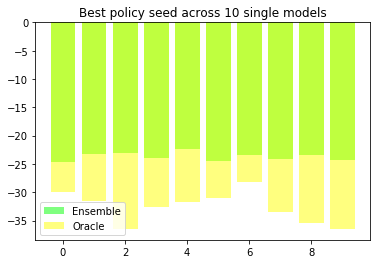

In [13]:
# graph using bar graph the best seed per ensemble
size_list = [1]
reps = 10
best_rs = np.zeros((len(size_list), reps))
best_ro = np.zeros((len(size_list), reps))

for i, ensemble_size in enumerate(size_list):
    best_rs = np.zeros((reps,))
    best_ro = np.zeros((reps,))
    for rep in range(reps):
        path = 'results/results-size{}-rep{}.pkl'.format(ensemble_size, rep)
        all_rs = []
        all_ro = []
        with open(path,'rb') as f:
            results = pickle.load(f)
            for ename in sorted(results.keys()):
                for psd in sorted(results[ename].keys()):
                    for _, rs, ro in results[ename][psd]:
                        all_rs.append(rs)
                        all_ro.append(ro)
            best_ix = np.argmax(all_rs)
            best_rs[rep] = all_rs[best_ix]
            best_ro[rep] = all_ro[best_ix]
    plt.figure()
    plt.title('Best policy seed across 10 single models')
    plt.bar(np.arange(reps), best_rs, color=(0,1,0,0.5), label='Ensemble')
    plt.bar(np.arange(reps), best_ro, color=(1,1,0,0.5), label='Oracle')
    plt.legend()
